## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [2]:
data = pd.read_csv('Advertising.csv')

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [7]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

## Simple linear regression 

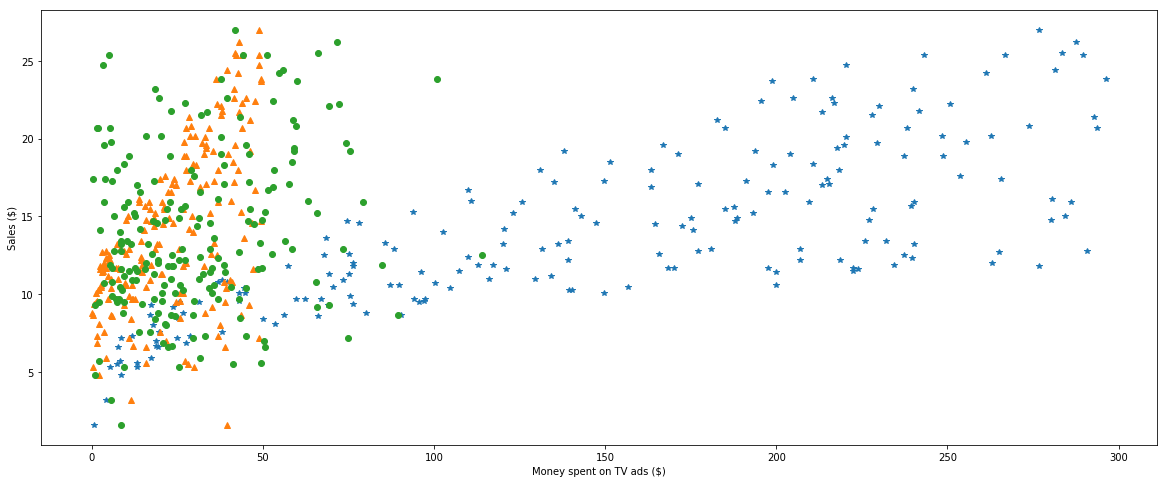

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(
    data['TV'],
    data['sales'],
    '*'
)
plt.plot(
    data['radio'],
    data['sales'],
    '^'
)
plt.plot(
    data['newspaper'],
    data['sales'],
    'o'
)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [12]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.1} + {:.1}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.047536640433019764
7.032593549127693
The linear model is: Y = 7e+00 + 0.05X


In [37]:
print("The Linear Model is : Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The Linear Model is : Y = 7.0326 + 0.047537X


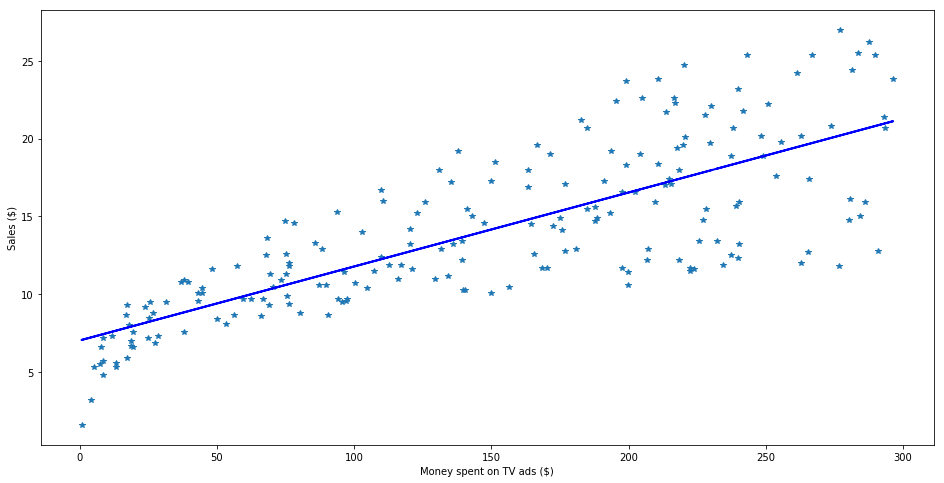

In [39]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.plot(
    data['TV'],
    data['sales'],
    '*'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [16]:
X = data['TV']
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        08:01:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Multiple linear regression 

In [ ]:
y = data['sales'].reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

In [ ]:
reg.score(Xs, y)

In [ ]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [44]:
mean_tv = np.mean(data['TV'])
mean_rd = np.mean(data['radio'])
mean_nw =  np.mean(data['newspaper'])
mean_tv,mean_rd,mean_nw


(147.0425, 23.264000000000024, 30.553999999999995)

In [47]:
test_pred = np.array([[mean_tv,mean_rd,mean_nw]])

In [48]:
test_pred

array([[147.0425,  23.264 ,  30.554 ]])